# Assignment 1 - Membership Functions in Fuzzy Sets - Genetic Algorithms and Probablistic Reasoning
### Shaurya Pratap Singh - 160102364 - CSE-D
### 1. Problem statement
[Example $2.5$, Page $38$, Fuzzy Logic with Engineering Applications by Timothy J. Ross] <br>
For this example, we need to visually depict the $(P, T)$ space where the system works, along with the corresponding degree of success/failure.

In [1]:
# The necessary imports.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# To remove warnings about font cache while loading mpl.
import warnings
warnings.filterwarnings("ignore")

# Embeds the plots in the jupyter notebook.
%matplotlib inline

# For pretty plots.
import seaborn as sns
sns.set()

### 2. Defining the metric functions
These are the membership functions that map their respective function domains to $[0, 1]$. For the purpose of simplicity, *radius* and *wall-thickness* parameters have not been considered. We only consider what the author has specified goes as input to the respective functions.<br>
$\mu_A(P, T) = \sqrt{\frac{P^2 \ + \ 4T^2}{78125}}$ <br>

$\mu_B(P, T) = \frac{P \ - \ \beta \ |T|}{125}$ <br>

$78125$ and $125$ can be thought of as normalization parameters to bring the functions' range to $[0, 1]$. 

In [2]:
def μA(P, T):
    return ((P ** 2 + 4 * T ** 2) / 78125) ** 0.5

def μB(P, T):
    β = 0.2
    return (P - β * T) / 125

### 3. Defining the domain and constructing a mesh
For easy understanding we take the domain for both the function to be $[0, 125]$, which has been distributed as $100$ evenly spaced points, seemingly a right granularity for plotting the function surfaces.

In [3]:
P = np.linspace(0, 125, 100)
T = np.linspace(0, 125, 100)

X, Y = np.meshgrid(P, T)

Z1 = μA(X, Y)
Z2 = μB(X, Y)

### 4. Plotting and analysing the functions
The functions have been plotted as heatmaps, $0-$blue has been taken as high degree of saftey and $1-$red has been considered high degree of failure. From the figure below we can see both of the functions that we have just modeled, and values for which the system stays safe or breaks.

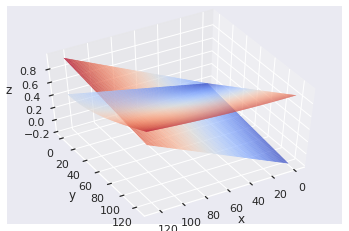

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(50, 60)

### 5. Finding the Intersection of the two membership functions
We know that for the system to function fully well we need to have both the components working, something that can be depicted by the intersection of the membership functions by the formula $\mu_A \cap \mu_B = \text{min}(\mu_A(P, T), \mu_B(P, T))$, which has been performed below.

In [5]:
# Taking the cartesian product for generating all possible pairs of our mesh.
PxT = np.transpose([np.tile(P, len(T)), np.repeat(T, len(P))])

# Generating the new function and reshaping to be plotted on the grid.
Z3 = np.array([min(μA(i[0],i[1]), μB(i[0],i[1])) for i in PxT]).reshape(100, 100)

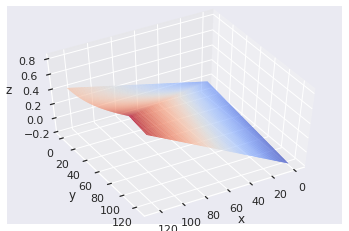

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z3, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(50, 60)

### Conclusion
The above figure depicts the $(P, T)$ space for our system. The red region has a high chance of breraking, because of higher pressure and torque whereas the blue to white regions are safer for the device operations. Further improvements can be made to the project by making more realistic metric functions.